# Лабораторна робота №4
## Тема: Deep Learning (CNN Computer Vision)
### Завдання
1. Виконати вирішення задачs класифікації для 3 класів з набору даних food101
2. Індекси класів визначити індивідуально за залежностями: i1=n-1,i2=n+29,i3=n+59 (де і1,і2,і3 - індекс класу (починаючи з 0) у відсортованому за алфавітом наборі даних, n - номер за списком групи
3. Результати оформити у вигляді файлу з кодом для моделювання та візуалізації у форматі .ipynb
4. Результати викласти у репозиторії GitHub (папка Lab4).
5. Підготуватися до захисту лабораторрної роботи (пояснення коду, відповіді на запитання за темою)

## Виконала
### студентка 4 курсу
### групи АнД-41
### Кліменкова Ніна
### Варіант 7

## Бібліотеки

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import imread, imshow, subplots, show
import random
import os
import time
import pathlib
import pandas as pd
import numpy as np
from sklearn import metrics
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D,Flatten,Dense,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam

In [6]:
for dirpath, dirnames, filenames in os.walk("train/"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 3 directories and 1 images in 'train/'.
There are 0 directories and 75 images in 'train/beet_salad'.
There are 0 directories and 75 images in 'train/escargots'.
There are 0 directories and 75 images in 'train/mussels'.


## Мої класи згідно варіанту - 6, 36, 66

In [7]:
data_dir = pathlib.Path("train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['.DS_Store' 'beet_salad' 'escargots' 'mussels']


## Випадкова картинка
### Виводимо картинки із наборів даних, щоб зрозуміти з чим ми маємо справу

In [8]:
def view_random_image(target_dir, target_class):
    # Setup target directory (we'll view images from here)
    target_folder = target_dir+target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)

    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");

    print(f"Image shape: {img.shape}") # show the shape of the image

    return img

Image shape: (512, 512, 3)


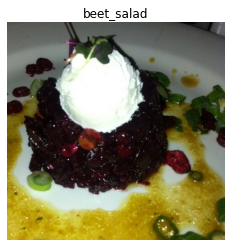

In [9]:
img = view_random_image(target_dir="train/",
                        target_class="beet_salad")

Image shape: (512, 512, 3)


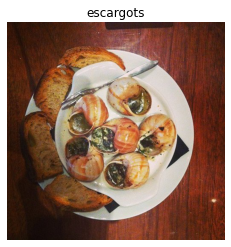

In [10]:
# View a random image from the training dataset
img = view_random_image(target_dir="train/",
                        target_class="escargots")

Image shape: (512, 512, 3)


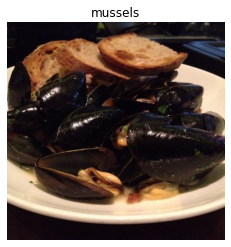

In [11]:
img = view_random_image(target_dir="train/",
                        target_class="mussels")

In [32]:
img.shape

(512, 512, 3)

## Модель 1

In [13]:
tf.random.set_seed(42)

# бінарний вид 
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "train/"
test_dir = "test/"

train_data = train_datagen.flow_from_directory(test_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode='categorical',
                                               seed=11)

valid_data = valid_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               seed=11)

Found 750 images belonging to 3 classes.
Found 225 images belonging to 3 classes.


In [14]:
model_1 = tf.keras.models.Sequential([
  Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(pool_size=2,  padding="valid"), # padding can also be 'same'
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"), 
  MaxPool2D(2),
  Flatten(),
  Dense(3, activation="softmax")])

# Compile the model
model_1.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])


# Fit the model
history_1 = model_1.fit(train_data,epochs=10,validation_data=valid_data)

Epoch 1/10
24/24 [==============================] - 19s 768ms/step - loss: 1.0632 - accuracy: 0.4173 - val_loss: 0.9724 - val_accuracy: 0.5067
Epoch 2/10
24/24 [==============================] - 15s 622ms/step - loss: 0.8971 - accuracy: 0.5880 - val_loss: 0.9678 - val_accuracy: 0.5289
Epoch 3/10
24/24 [==============================] - 16s 667ms/step - loss: 0.8538 - accuracy: 0.5947 - val_loss: 0.9262 - val_accuracy: 0.5111
Epoch 4/10
24/24 [==============================] - 14s 595ms/step - loss: 0.7474 - accuracy: 0.6653 - val_loss: 0.9855 - val_accuracy: 0.5511
Epoch 5/10
24/24 [==============================] - 14s 598ms/step - loss: 0.6043 - accuracy: 0.7800 - val_loss: 1.2660 - val_accuracy: 0.4533
Epoch 6/10
24/24 [==============================] - 14s 600ms/step - loss: 0.4355 - accuracy: 0.8627 - val_loss: 1.3820 - val_accuracy: 0.4978
Epoch 7/10
24/24 [==============================] - 14s 595ms/step - loss: 0.2341 - accuracy: 0.9293 - val_loss: 1.4471 - val_accuracy: 0.4444

In [20]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

## Візуалізація

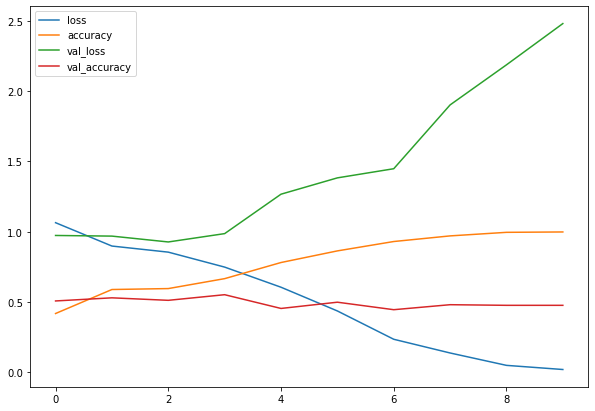

In [21]:
pd.DataFrame(history_1.history).plot(figsize=(10, 7))

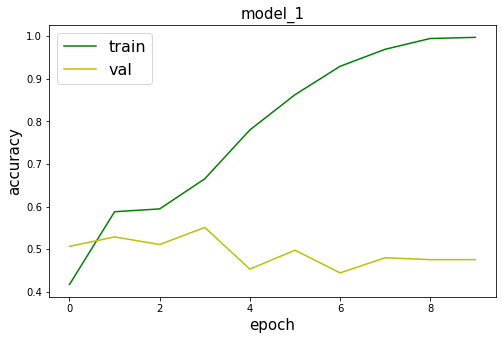

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(8,5))
ax.plot(history_1.history['accuracy'], 'g', label='train')
ax.plot(history_1.history['val_accuracy'], 'y' ,label='val')
ax.set_xlabel(r'epoch', fontsize=15)
ax.set_ylabel(r'accuracy', fontsize=15)
ax.legend()
plt.title("model_1", fontsize = 15)
plt.legend(prop={'size': 16})
ax.tick_params(labelsize=10)


## З графіку видно, що на тренувальній вибірці точність досить висока, чого не можна сказати про валідаційну. Спробуємо виправити це становище. Також бачимо явний overfitting

## Після ряду експерементів з налаштуванням параметрів, демонструю найкращий варіант, який дав найвищу точність на тестовій вибірці. Але при цьому залишився overfitting

In [23]:
model_the_best = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(2),
  Flatten(),
  Dense(3, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_the_best.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
history_the_best = model_the_best.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/10
24/24 [==============================] - 21s 872ms/step - loss: 1.0829 - accuracy: 0.4253 - val_loss: 0.9630 - val_accuracy: 0.4978
Epoch 2/10
24/24 [==============================] - 16s 659ms/step - loss: 0.8757 - accuracy: 0.6027 - val_loss: 0.9332 - val_accuracy: 0.5733
Epoch 3/10
24/24 [==============================] - 16s 651ms/step - loss: 0.7712 - accuracy: 0.6707 - val_loss: 0.9085 - val_accuracy: 0.5822
Epoch 4/10
24/24 [==============================] - 16s 645ms/step - loss: 0.6541 - accuracy: 0.7387 - val_loss: 1.0090 - val_accuracy: 0.5467
Epoch 5/10
24/24 [==============================] - 16s 702ms/step - loss: 0.6386 - accuracy: 0.7293 - val_loss: 1.0995 - val_accuracy: 0.5067
Epoch 6/10
24/24 [==============================] - 15s 637ms/step - loss: 0.4849 - accuracy: 0.8227 - val_loss: 1.0139 - val_accuracy: 0.6089
Epoch 7/10
24/24 [==============================] - 15s 633ms/step - loss: 0.3499 - accuracy: 0.8760 - val_loss: 1.0485 - val_accuracy: 0.5200

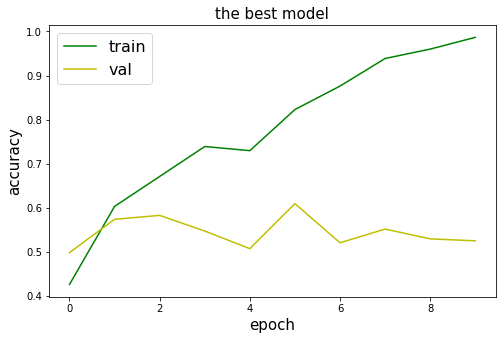

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(8,5))
ax.plot(history_the_best.history['accuracy'], 'g', label='train')
ax.plot(history_the_best.history['val_accuracy'], 'y' ,label='val')
ax.set_xlabel(r'epoch', fontsize=15)
ax.set_ylabel(r'accuracy', fontsize=15)
ax.legend()
plt.title("the best model", fontsize = 15)
plt.legend(prop={'size': 16})
ax.tick_params(labelsize=10)

## Прогнозуємо класи

In [25]:
def load_and_prep_image(filename, img_shape=224):
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

def pred_and_plot(model, filename, class_names):
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

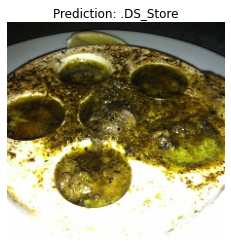

In [26]:
pred_and_plot(model_the_best, "train/escargots/689502.jpg", class_names)

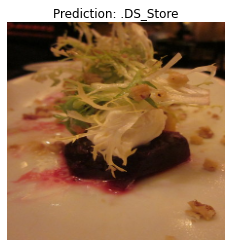

In [27]:
pred_and_plot(model_1, "train/beet_salad/326878.jpg", class_names)

# Висновок
## У ході виконання даної лабораторної роботи була досліджена структура і параметри згорткової нейромережі. Була проведена классифікація, але через оверфітінг не вдалось досягнути вискокої точності. Також була сдійснена візуалізація результатів.